# **23.01.04 K vs avarage phase velocity**

In [2]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from TO_sim.Utility import *

In [3]:
DF = 'Review/23.01.04 K vs avarage phase velocity/'
Create_Folder(DF)

In [154]:
N = 500
dist = 'Quantile Normal'
t_end = 200
ss = 14
N = 500
dK = 0.1
dt = 0.1
m = 6
applys = [1]
save = True
ms = [6]
Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

for m in ms:
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10)
    df_sets[m] = df
    rdf_sets[m] = rdf

  0%|          | 0/125 [00:00<?, ?it/s]

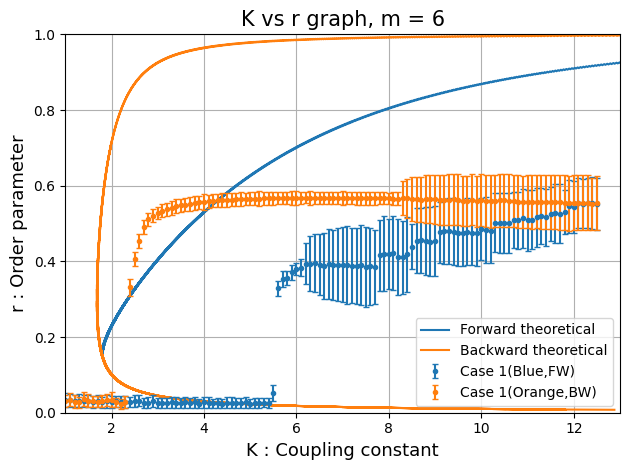

In [ ]:
ST = 50
Ks = df.index
Ksr = rdf.index
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    Draw_ = DD(m=m,dist = 'normal')
    Draw_.total()

    plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Case 1(Blue,FW)')
    plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Case 1(Orange,BW)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist},m = {m}, K vs r graph.png',dpi=400)

In [145]:
Ks = df.index
Ksr = rdf.index

In [146]:
m = 6
df = df_sets[m]

In [147]:
def temp_func(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result

In [148]:
temp = rdf.dtheta_s.apply(temp_func)

In [149]:
A = np.array(temp.to_list())

In [150]:
omega = df.iloc[0].Omega

In [151]:
# N_omega = (omega-np.min(omega))/(np.max(omega)-np.min(omega))
N_omega = (omega+3)/(6)

(-6.0, 6.0)

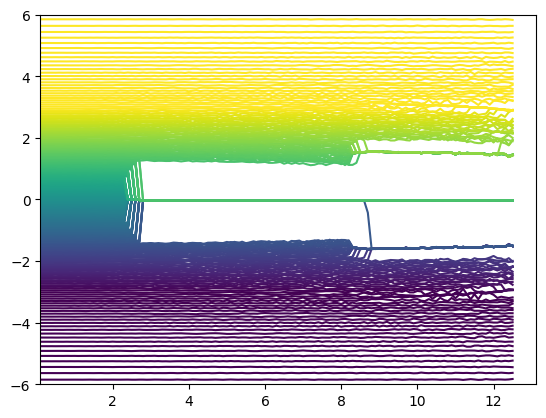

In [153]:
color = plt.cm.viridis(N_omega)
for i,mean_pv in enumerate(A.T):
    plt.plot(Ksr,mean_pv,color = color[i]);
plt.xlim(0.1)
plt.ylim(-6,6)